72821

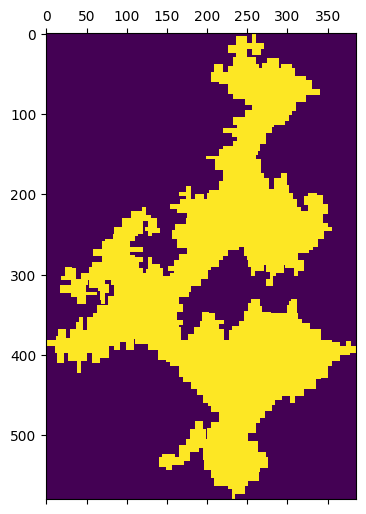

In [5]:
import numpy as np
with open("input18.txt", "r") as f:
    lines = f.readlines()
lines =  [[line[0], int(line.split()[1])] for line in lines]

def contour_grid(lines):
    delta = {"R": (0,1), "D": (1,0), "L": (0,-1), "U": (-1,0)}
    current = np.array([0,0])
    vertices = [tuple(current)]
    for line in lines:
        current = current + line[1]*np.array(delta[line[0]])
        vertices.append(tuple(current))
    min0, min1 = min(vertices)[0], min(vertices, key=lambda x:x[1])[1]
    grid = np.zeros((max(vertices)[0]-min0+1, max(vertices, key=lambda x:x[1])[1]-min1+1), int)
    for _ in range(len(lines)):
        p1 = tuple(map(sum,zip(vertices.pop(0),(-min0,-min1))))
        p2 = tuple(map(sum,zip(vertices[0],(-min0,-min1))))
        if p1[0]==p2[0]:
            grid[p1[0],min(p1[1],p2[1]):max(p1[1],p2[1])+1] = 1
        elif p1[1]==p2[1]:
            grid[min(p1[0],p2[0]):max(p1[0],p2[0])+1, p1[1]] = 1
        else:
            raise ValueError("Consecutive vertices should have one component in common, not the case for",p1,p2)
    return grid

grid = contour_grid(lines)

def fillgrid(grid):
    displacemts = {(0,1), (1,0), (0,-1), (-1,0)}
    for i in range(len(grid)):
        ones = list(map(int,np.argwhere(grid[i]==1).copy()))
        if ones[1]>ones[0]+1:
            break
    neighbors = {(i,ones[0]+1)} #initial point inside
    while neighbors!=set():
        new_nb = set()
        for nb in neighbors:
            grid[nb]=1
            new_nb = new_nb.union({tuple(map(sum,zip(nb,d))) for d in displacemts})
        neighbors = {n for n in new_nb if grid[n]==0}
    return grid

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [2, 2]
grid = fillgrid(grid)
plt.matshow(grid);
np.count_nonzero(grid)

In [2]:
import numpy as np
np.set_printoptions(linewidth=np.inf)
with open("input18.txt", "r") as f:
    lines = f.readlines()
lines =  [[int(line.removesuffix("\n")[-2]), int(line.removesuffix("\n")[-7:-2],16)] for line in lines]
lines

def vert_maker(lines):
    delta = {0: (0,1), 1: (1,0), 2: (0,-1), 3: (-1,0)}
    current = np.array([0,0])
    vertices = [tuple(current)]
    for line in lines:
        current = current + line[1]*np.array(delta[line[0]])
        vertices.append(tuple(current))
    return vertices

def minigrid_maker(vertices):
    row_values, col_values = sorted({v[0] for v in vertices}), sorted({v[1] for v in vertices})
    minigrid = np.zeros((2*len(row_values)-1,2*len(col_values)-1), bool) #boolean is slower, but makes multiplication later remain int, not go to float
    for i in range(len(lines)):
            p1 = vertices[i]
            p1_0, p1_1 = row_values.index(p1[0])*2, col_values.index(p1[1])*2
            p1 = (p1_0, p1_1)
            p2 = vertices[i+1]
            p2_0, p2_1 = row_values.index(p2[0])*2, col_values.index(p2[1])*2
            p2 = (p2_0, p2_1)
            if p1[0]==p2[0]:
                minigrid[p1[0],min(p1[1],p2[1]):max(p1[1],p2[1])+1] = 1
            elif p1[1]==p2[1]:
                minigrid[min(p1[0],p2[0]):max(p1[0],p2[0])+1, p1[1]] = 1
            else:
                raise ValueError("Consecutive vertices should have one component in common, not the case for",p1,p2)
    return minigrid, row_values, col_values

def fillgrid(grid):#exactly the same as before
    displacemts = {(0,1), (1,0), (0,-1), (-1,0)}
    for i in range(len(grid)):
        ones = list(map(int,np.argwhere(grid[i]==1).copy()))
        if ones[1]>ones[0]+1:
            break
    neighbors = {(i,ones[0]+1)} #initial point inside
    while neighbors!=set():
        new_nb = set()
        for nb in neighbors:
            grid[nb]=1
            new_nb = new_nb.union({tuple(map(sum,zip(nb,d))) for d in displacemts})
        neighbors = {n for n in new_nb if grid[n]==0}
    return grid

def multiplcty_maker(minigrid, row_values, col_values, int_format=np.uint64):
    multiplicity = np.ones(minigrid.shape, int_format) #int format uint64 needed because number go past 2**32
    row_diffs = [row_values[i+1]-row_values[i]-1 for i in range(len(row_values)-1)]
    col_diffs = [col_values[i+1]-col_values[i]-1 for i in range(len(col_values)-1)]

    for i in range(multiplicity.shape[0]):
        i_mult = int_format(row_diffs[int((i-1)/2)] if i%2==1 else 1)
        for j in range(multiplicity.shape[1]):
            j_mult = int_format(col_diffs[int((j-1)/2)] if j%2==1 else 1)
            multiplicity[i,j] = i_mult*j_mult
    return multiplicity

vertices = vert_maker(lines)
minigrid, row_values, col_values = minigrid_maker(vertices)
minigrid = fillgrid(minigrid)
multiplicity = multiplcty_maker(minigrid, row_values, col_values) #multiplying the existing grid by the multiplicity actually takes a bit longer
(multiplicity*minigrid).sum()

127844509405501

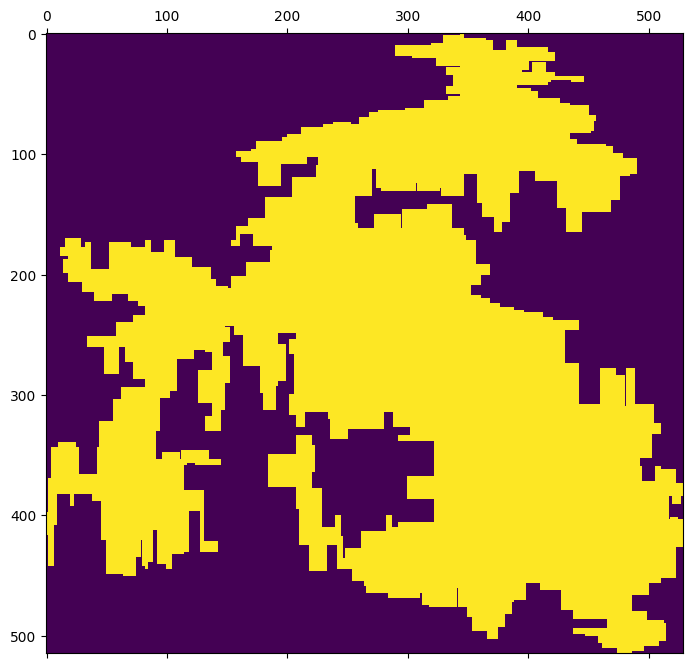

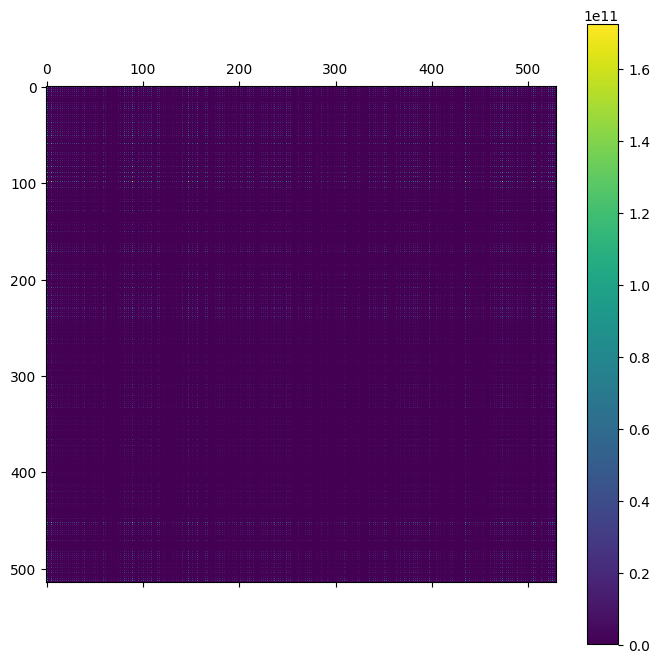

In [124]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.matshow(minigrid);
plt.matshow(multiplicity); plt.colorbar();

.

.

.

.

.

.

.

.

.

.

In [53]:
for row in grid:
    # row = grid[1]
    ones = list(map(int,np.argwhere(row==1).copy()))
    while len(ones) > 1:
    # for i in range(len(ones)-1):
        if ones[1]!=ones[0]+1:
            row[ones[0]:ones[0+1]] = 1
            ones=ones[2:]
        else:
            i = 2
            while i<len(ones) and ones[i] == ones[0]+i:
                i += 1
            ones = ones[i-1:]


        
